# Create map of parcel data

In [1]:
# set up
import os
import geopandas
import matplotlib.pyplot as plt
import numpy as np

os.chdir("../data/")

In [2]:
# load data
parcels = geopandas.read_file('Parcels_FY19')

## Look at data

In [3]:
parcels.head()

,OBJECTID,Map,Block,Lot,MBL,PolyType,AddNum,Street,AddNum2,Street2,AddNum3,Street3,SublotOf,TaxParMBL,Shape_Leng,Shape_Area,geometry
0,1,19,F,1,19-F-1,PARCEL,838,BROADWAY,None,None,None,None,None,19-F-1,2133.460536,197502.465873,"(POLYGON ((759940.058133468 2971010.939469054,..."
1,2,54,D,5,54-D-5,PARCEL,393,WASHINGTON ST,None,None,None,None,None,54-D-5,316.130596,2397.402540,(POLYGON ((762784.5485074669 2963229.330360398...
2,3,85,A,14,85-A-14,PARCEL,0,ASSEMBLY ROW,None,None,None,None,None,85-A-14,9542.340855,207970.565472,"POLYGON ((769452.9154200554 2969581.503351554,..."
3,4,94,C,6,94-C-6,PARCEL,10,POPLAR ST,None,None,None,None,None,94-C-6,1492.376498,83911.819744,"POLYGON ((767606.6182596385 2962997.970258817,..."
4,5,117,A,2,117-A-2,PARCEL,0,INNER BELT RD,None,None,None,None,None,117-A-2,4249.883150,239816.278490,(POLYGON ((771386.5998728871 2961124.379845887...


In [4]:
parcels.columns

Index(['OBJECTID', 'Map', 'Block', 'Lot', 'MBL', 'PolyType', 'AddNum',
       'Street', 'AddNum2', 'Street2', 'AddNum3', 'Street3', 'SublotOf',
       'TaxParMBL', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [5]:
for col in ['Map', 'Block', 'Lot']:
    print("\n\n" + col)
    print(round(parcels[col].value_counts(normalize=True)*100, 4))



Map
7      2.2305
27     2.0594
29     2.0167
28     1.9597
90     1.8171
8      1.8171
92     1.7031
34     1.6604
13     1.6319
11     1.6176
51     1.5820
41     1.5820
35     1.5749
3      1.5677
52     1.5392
78     1.5107
50     1.4965
17     1.4822
16     1.4751
38     1.4252
44     1.4110
83     1.4038
42     1.3967
32     1.3682
30     1.3468
71     1.3183
47     1.3183
49     1.2969
20     1.2756
48     1.2756
        ...  
4      0.3563
94     0.3207
1      0.2922
2      0.2494
77     0.2423
57     0.1853
101    0.1496
14     0.1283
111    0.1211
85     0.1211
99     0.1140
115    0.1140
112    0.0784
113    0.0713
67     0.0499
107    0.0499
106    0.0428
110    0.0428
5      0.0428
88     0.0428
87     0.0356
108    0.0356
109    0.0285
117    0.0285
116    0.0285
114    0.0214
86     0.0143
84     0.0143
100    0.0143
98     0.0071
Name: Map, Length: 117, dtype: float64


Block
A    17.4031
C    16.2272
B    15.0798
D    13.2982
E    11.6591
F     7.5399
G     6.4852
H 

## Exploratory maps

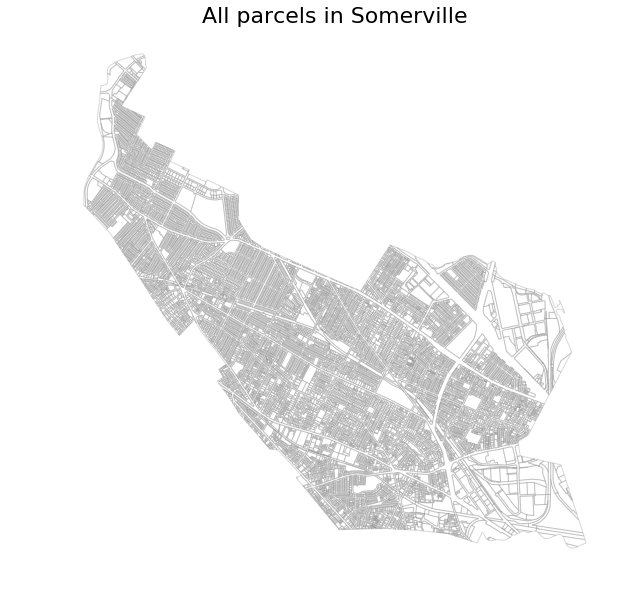

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
parcels.plot(ax=ax, color='white', edgecolor='grey', alpha=0.3)
plt.title("All parcels in Somerville", fontsize=22)
plt.axis('off');

/Users/anthonyrentsch/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:418: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


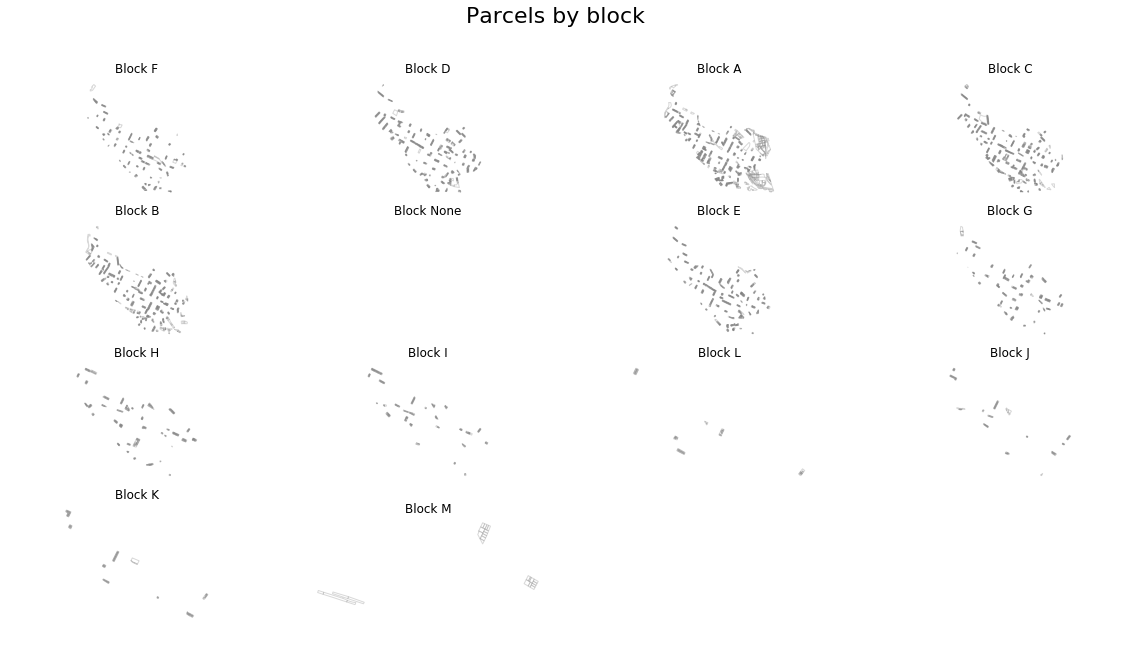

In [7]:
COLUMNS = 4
fig, ax = plt.subplots(nrows=int(np.ceil(parcels['Block'].nunique()/COLUMNS)), ncols=COLUMNS, figsize=(20,10))

row_counter = -1
for i, block in enumerate(parcels['Block'].unique()):
    
    if block != "None":
        
        if i % COLUMNS == 0:
            row_counter += 1
            cur_ax = ax[row_counter, i % COLUMNS]
        else:
            cur_ax = ax[row_counter, i % COLUMNS]
        
        parcels[parcels['Block']==block].plot(ax=cur_ax, color='white', edgecolor='grey', alpha=0.3)
        cur_ax.set_title(f"Block {block}")

[axi.set_axis_off() for axi in ax.ravel()] # remove axes
plt.suptitle("Parcels by block", fontsize=22);

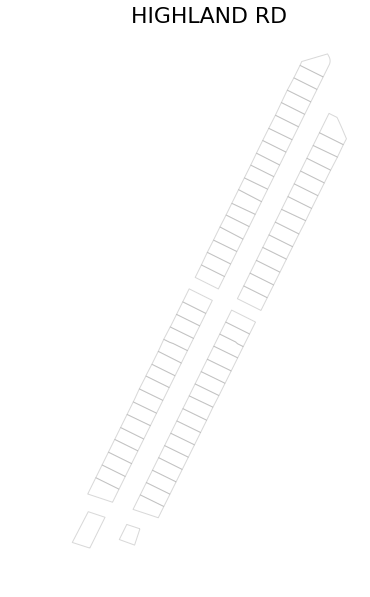

In [8]:
STREET = 'HIGHLAND RD'

fig, ax = plt.subplots(figsize=(20,10))
parcels[parcels['Street'] == STREET].plot(ax=ax, color='white', edgecolor='grey', alpha=0.3)
plt.title(STREET, fontsize=22)
plt.axis('off');